# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We, **Team 6**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Climate Change Belief Analysis 2022

The impact of climate change is becoming more evident on a global scale. However, for reasons best known to various individuals and groups, they seem to doubt the authenticity of the claims by weather and climate expert about climate change. For example, many places have experienced changes in rainfall, resulting in more floods, droughts, or intense rain, as well as more frequent and severe heat waves. The planet's oceans and glaciers have also experienced changes—oceans are warming and becoming more acidic, ice caps are melting, and sea level is rising. 

Therefore,there is a need for us as humans to be attentive and thougthful about how we approach the issue of climate change and its adverse effect on our planet. As a team, we intend to determine the level of awareness as well as the sentiment of Twitter users about the subject of climate change.




<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
from comet_ml import Experiment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, log_loss, recall_score, confusion_matrix\

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
from tensorflow.keras.utils import to_categorical

from sklearn.utils import resample

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `train.csv` file into a DataFrame. |

---

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |



Here we use various methods to take an in-depth look at our dataframe. These methods include:
<ul>
<li>isnull()</li>
<li>info()</li>
<li>shape</li>
<li>WordCloud()</li>

</ul>

#### isnull()

Here we determine whether of not there are null values in our dataframe

In [3]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

#### info()

To determine the type of data in the dataframe, we call the .info() method on the dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


#### Shape

To determine the shape of the dataframe, we call the shape attribut on the dataframe.

In [5]:
df.shape

(15819, 3)

#### WordCloud

A word cloud is important to visualize the most common words in a column of interest.

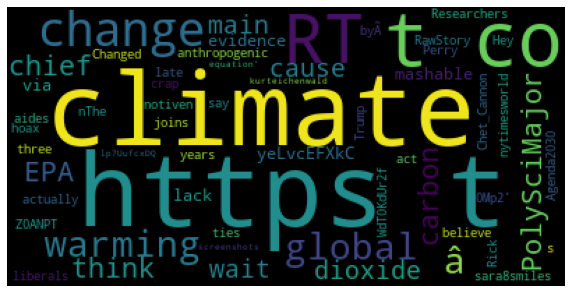

In [6]:
#Graphical EDA (wordcloud)
def word_cloud (df, column_name):
    wc = WordCloud()
    text = df[column_name].values
    msg_cloud = wc.generate(str(text))
    
    #plot wordcloud
    fig,ax = plt.subplots(figsize=(10,10))
    ax.plot
    plt.imshow(msg_cloud)
    plt.axis('off')
    plt.show
    
    return wc

word_cloud(df, 'message')

#### Balanced/Imbalanced Data

A histogram of the unique elenment the target column (sentiments) is important to visualize the level of balance/imbalance of the data. In a situation where the data is highly imbalanced, tweaking becomes necessary to balance the data. 

[1, 2, 0, -1]


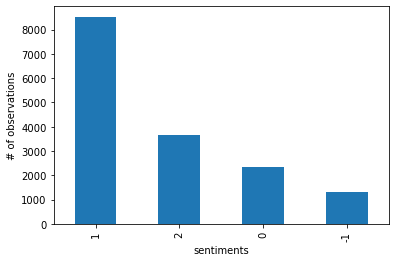

In [7]:
sentiment_labels = list(df.sentiment.unique())
print(sentiment_labels)

df['sentiment'].value_counts().plot(kind = 'bar')
plt.ylabel("# of observations")
plt.xlabel("sentiments")
plt.show()

From the above histogram, is clear that the data is highly imbalanced. The data will be balanced in the Data Engineering section using the CountVectorizer.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

Our data is imbalanced label-wise, and balaning the data may improve the predictive performance of our model. We balance the data by first spliting the data into four groups based on the sentiments, then we upscale and downscale the group where necessary. 

In [8]:
all_msg = df.copy()

In [9]:
#seperate the sentiments
df_pro= all_msg[all_msg['sentiment']==1]
df_factual= all_msg[all_msg['sentiment']==2]
df_neutral= all_msg[all_msg['sentiment']==0]
df_anti= all_msg[all_msg['sentiment']== -1]

#upsample minority class seperately
df_anti_upsampled= resample(df_anti,
                            replace=True,
                            n_samples=4265,
                            random_state=42
                            )
df_neutral_upsampled= resample(df_neutral,
                            replace=True,
                            n_samples=4265,
                            random_state=42
                            )
df_factual_upsampled= resample(df_factual,
                            replace=True,
                            n_samples=4265,
                            random_state=42
                            )

#downsample majority class
df_pro_downsampled = resample(df_pro,
                              replace=False,
                              n_samples= 4265,
                              random_state=42
                             )

#combine the dataframes
all_msg_2= pd.concat([df_pro_downsampled, df_factual_upsampled, df_neutral_upsampled, df_anti_upsampled])
print (all_msg_2['sentiment'].value_counts())

 0    4265
 1    4265
 2    4265
-1    4265
Name: sentiment, dtype: int64


In [10]:
print(df_anti.shape)
print(df_neutral.shape)
print(df_pro.shape)
print(df_factual.shape)

(1296, 3)
(2353, 3)
(8530, 3)
(3640, 3)


The newly created groups include anti(-1), neutral(0), pro(1), and factual(2); these groups contains 1296, 2353, 8530, and 3640 observations, respectively. The anti, neutral, and factual groups were upscaled to 4265 observations by resampling with replacement, while the pro group was downscaled by resampling without replacement.

It is **important to note** that the model that was train with the imbalanced data outperformed the model that was trained with the balanced data; hence, we proceeded with the model that was trained with the imbalaced data. The observation could be as a result of the relatively smaller portion of observation in some of the lower classes (pro and neutral) as well as the small dataset (less that 16000 observations).

In order for our Machine Learning model to determine the sentiment of a user as regards global warming, the model has to analyze a piece of text—in our case, tweets—that was written by a user. Machine learning models can not handel categorical data without preprocessing of the data. In our case, we use the CountVectorizer to preprocess the column of data that will be fed to the Machine Learning model.

The CountVectorizer is used to transform column of text into a vector on the basis of the frequency (count) of each word that occurs in the entire column of text

Before we apply the CountVectorizer, it is important to clean up the column of text. The clean up precess include the following steps:
<ul>
    <li>Replace all URLs with 'url-web'</li>
    <li>Set all elements in the column of test to lower case</li>
    <li>Remove punctuations</li>
</ul>


In [19]:
#Replace all URLs with 'url-web'

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_msg['message'] = all_msg['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [20]:
#Define fuction to remove punctuation

def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [21]:
all_msg['message'] = all_msg['message'].str.lower() #set text to lower case
all_msg['message'] = all_msg['message'].apply(remove_punctuation) #Remove puctuations

In [22]:
betterVect = CountVectorizer(min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 2))

#The model performed better without removing stopwords

In [23]:
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
df_test['message'] = df_test['message'].str.lower()
df_test['message'] = df_test['message'].apply(remove_punctuation)

In [24]:
X_train = betterVect.fit_transform(all_msg['message'])
X_test = betterVect.transform(df_test['message'])

In [25]:
y_train = all_msg.sentiment

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more classification models that is/are able to classify whether or not a person believes in climate change, based on their novel tweet data.

---

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

C:\Users\shola\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9935520576521905

In [231]:
AdBoost = AdaBoostClassifier()
AdBoost.fit(X_train, y_train)
AdBoost.score(X_train, y_train)

0.6475124849864088

In [232]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF.score(X_train, y_train)

0.9982299766104052

In [233]:
GNB = GaussianNB()
GNB.fit(X_train.toarray() , y_train)
GNB.score(X_train.toarray(), y_train)

0.9654213287818446

In [234]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
#y_pred = MNB.predict(X_val)
MNB.score(X_train, y_train)

# Calculate the log loss
#print("The log loss error for our model is: ", log_loss(y_val, y_pred))

0.8719261647386055

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<li>Classifiation Report</li>
<li>Confusion Matrix</li>

We'll have to split the data to train and validation set to obtain y_val for the confusion matrix

In [37]:
print("\nResults\nConfusion matrix \n {}".format(
    confusion_matrix(y_val, y_pred)))


Results
Confusion matrix 
 [[ 120   53   74   15]
 [  27  237  145   52]
 [  41  161 1299  209]
 [   6   17   82  626]]


In [243]:
predictions = logreg.predict(X_test)


df_CSV = pd.DataFrame({"tweetid": df_test['tweetid'].values,
                   "sentiment": predictions,
                  })

df_CSV.to_csv("Team6_logreg_ProT_imBal.csv", index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [63]:
# Setting the API key (saved as environment variable)

# Create an experiment with your api key
experiment = Experiment(
    api_key="CiIdM6vK7NzhmF0W3SwXaz3RE",
    project_name="general",
    workspace="sholaog",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sholaog/general/044d51073dd440d79b551de5946ca78c



In [64]:
# Saving each metric to add to a dictionary for logging

cm = confusion_matrix(y_val, y_pred)
#f1 = f1_score(y_val, y_pred)
#precision = precision_score(y_val, y_pred)
#recall = recall_score(y_val, y_pred)

In [65]:
# Create dictionaries for the data we want to log

params = {"model_type": "MultinomialNB",
          }
#metrics = {"f1": f1,
#           "recall": recall,
#           "precision": precision
#           }

metrics = {"Confussion Matrix": cm          }

In [66]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix()

COMET WARNING: Cannot safely convert array([[ 120,   53,   74,   15],
       [  27,  237,  145,   52],
       [  41,  161, 1299,  209],
       [   6,   17,   82,  626]], dtype=int64) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET ERROR: Attempt to log empty confusion matrix; ignoring


In [67]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sholaog/general/044d51073dd440d79b551de5946ca78c
COMET INFO:   Metrics:
COMET INFO:     Confussion Matrix : [[ 120   53   74   15]
 [  27  237  145   52]
 [  41  161 1299  209]
 [   6   17   82  626]]
COMET INFO:   Parameters:
COMET INFO:     model_type : MultinomialNB
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: -----------

In [68]:
experiment.display()